<a href="https://www.kaggle.com/code/mosesmoncy/glass-type-prediction?scriptVersionId=132279152" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Glass type prediction in machine learning refers to the task of classifying different types of glass based on their characteristics or properties using machine learning algorithms. The goal is to build a predictive model that can accurately determine the type of glass based on a set of input features.

The input features for glass type prediction can include various physical and chemical properties of the glass, such as refractive index, sodium content, magnesium content, aluminum content, silicon content, potassium content, calcium content, barium content, iron content, and the presence of other elements. These features are typically measured or determined through laboratory tests.

To develop a glass type prediction model, a dataset is constructed that contains samples of different glass types, along with their corresponding features. This dataset is then used to train a machine learning algorithm, such as decision trees, random forests, support vector machines, or neural networks. During the training process, the algorithm learns patterns and relationships between the input features and the corresponding glass types.

Once the model is trained, it can be used to predict the type of glass for new, unseen samples based on their feature values. The model takes the feature values of the new sample as input and produces a predicted glass type as output.

Glass type prediction models have various applications, such as in the manufacturing industry for quality control, in forensic investigations to analyze glass evidence, and in material science research.

Model is created to predict the 'Type' of glass using Classification Models..

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
a=pd.read_csv('/kaggle/input/glass-csv/glass.csv')
a

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
# read first five data

a.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
# read last five data

a.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
a.shape

(214, 10)

In [7]:
a.describe

<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [8]:
a.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [9]:
a.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


<AxesSubplot:xlabel='Type', ylabel='count'>

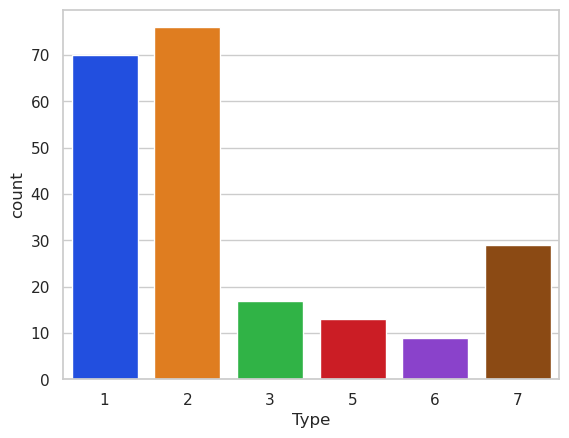

In [10]:
a_type = a['Type'].value_counts()
print(a_type)

sns.set(style = 'whitegrid')
sns.countplot(x="Type", data=a, palette='bright')

<AxesSubplot:ylabel='Fe'>

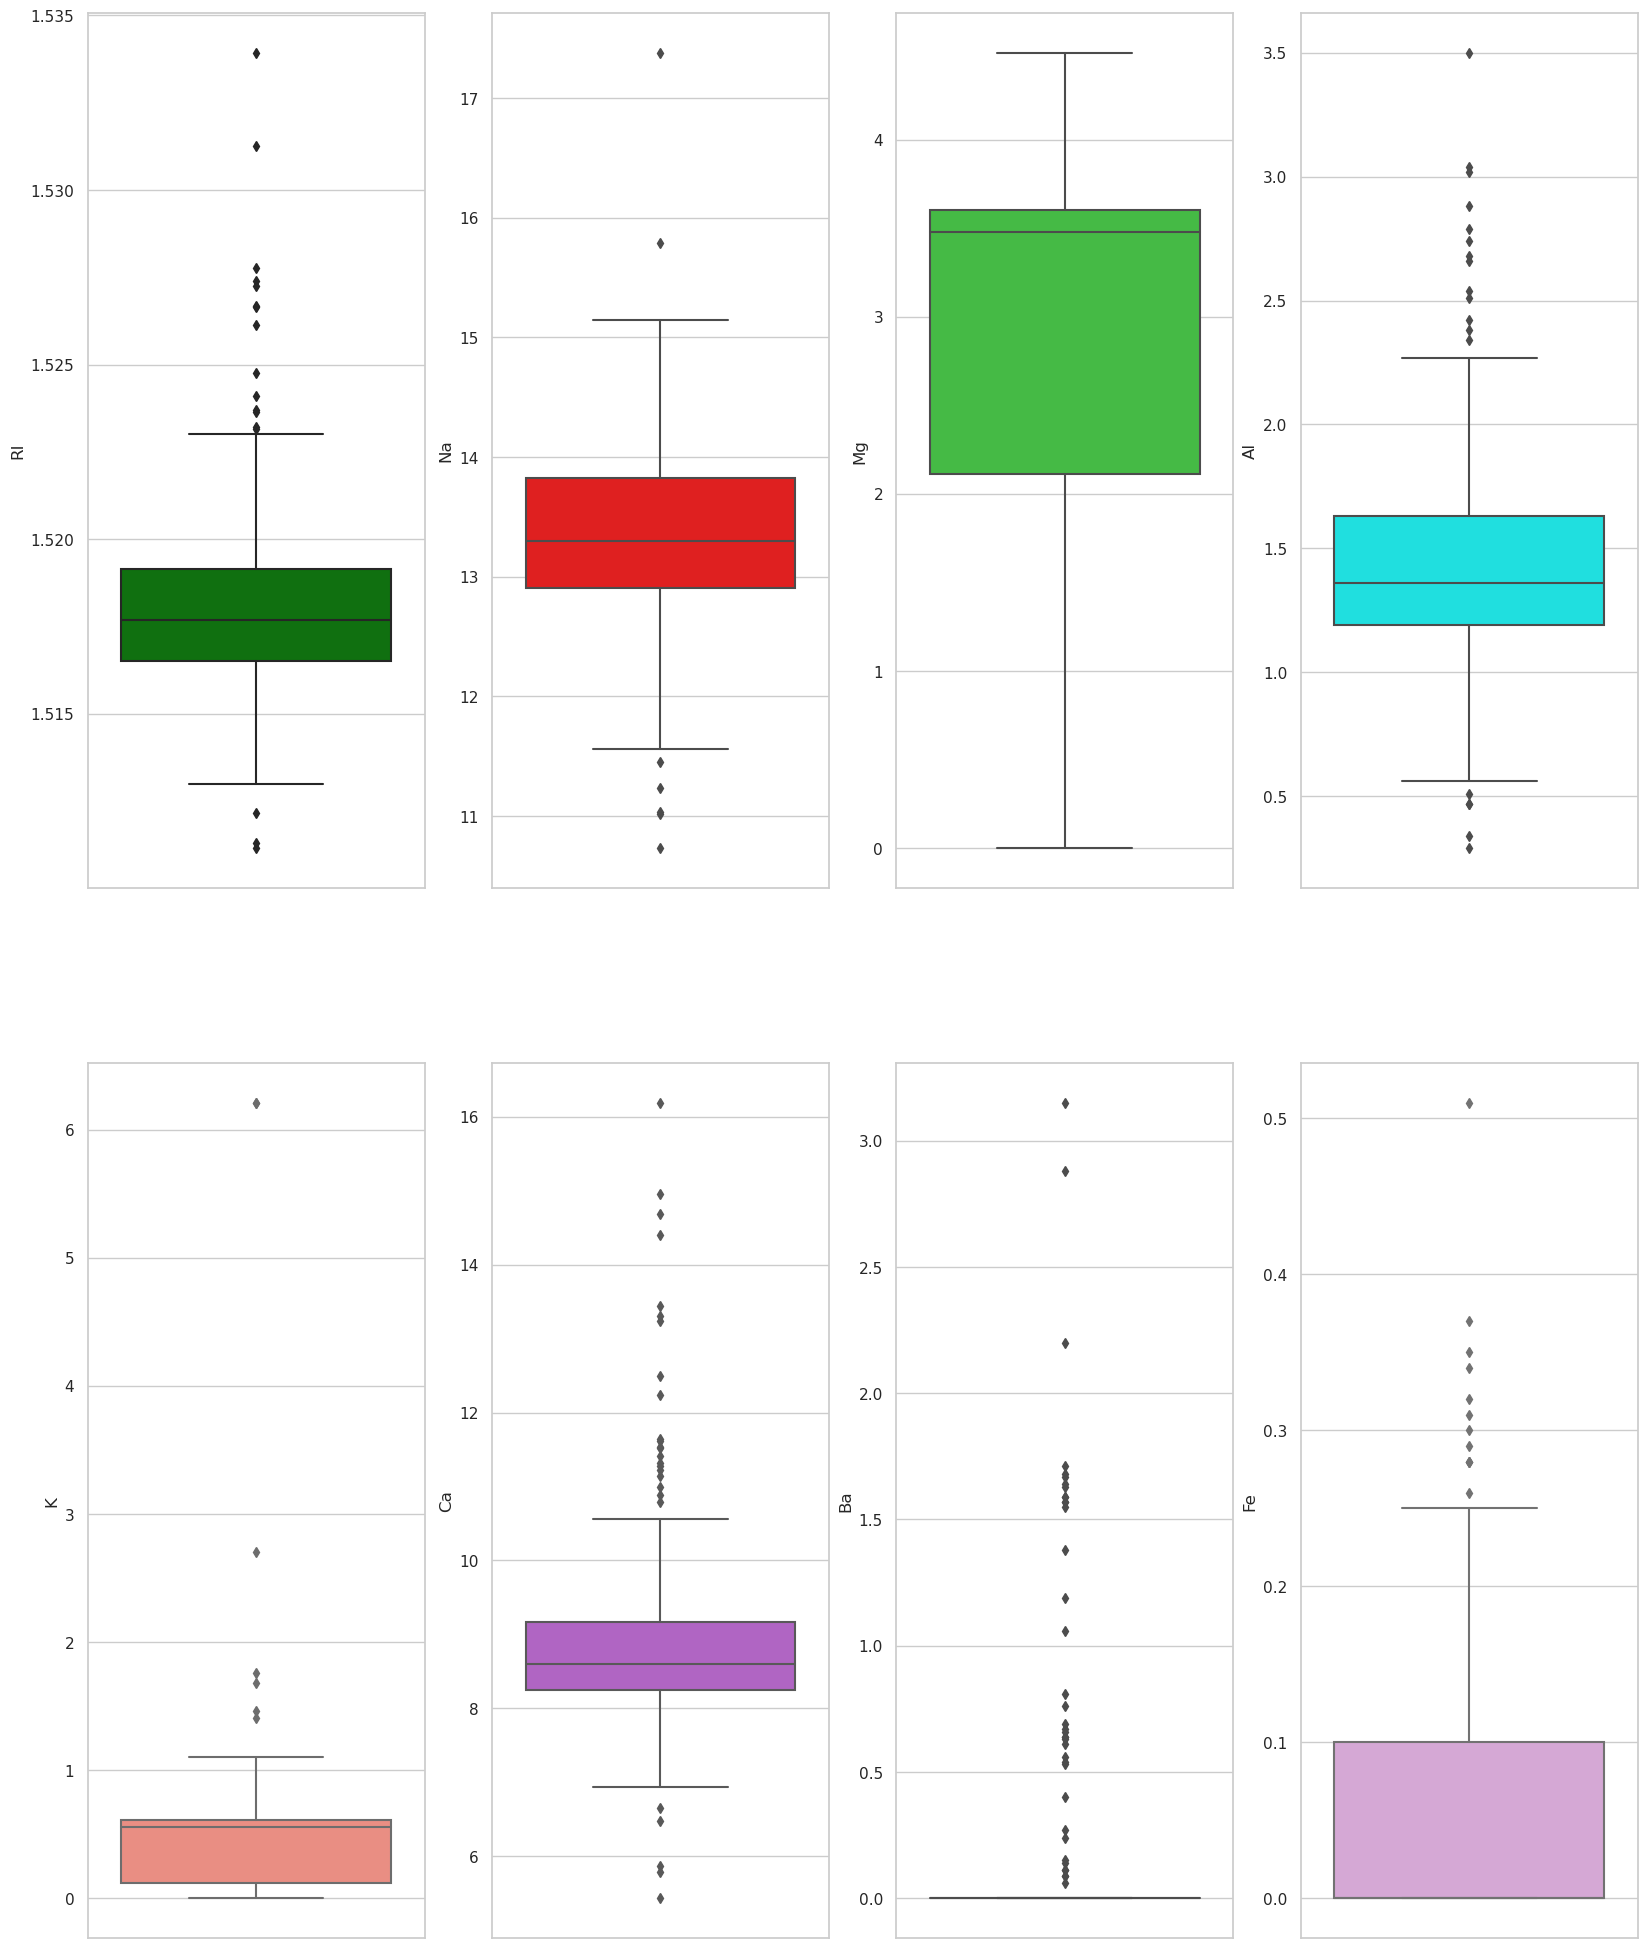

In [11]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (20,25))
sns.boxplot(ax = ax1, y = 'RI', data = a, color = 'green')
sns.boxplot(ax = ax2, y = 'Na', data = a, color = 'red')
sns.boxplot(ax = ax3, y = 'Mg', data = a, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Al', data = a, color = 'cyan')
sns.boxplot(ax = ax5, y = 'K', data = a, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Ca', data = a, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Ba', data = a, color = 'lime')
sns.boxplot(ax = ax8, y = 'Fe', data = a, color = 'plum')

In [12]:
a.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<AxesSubplot:xlabel='Fe', ylabel='Count'>

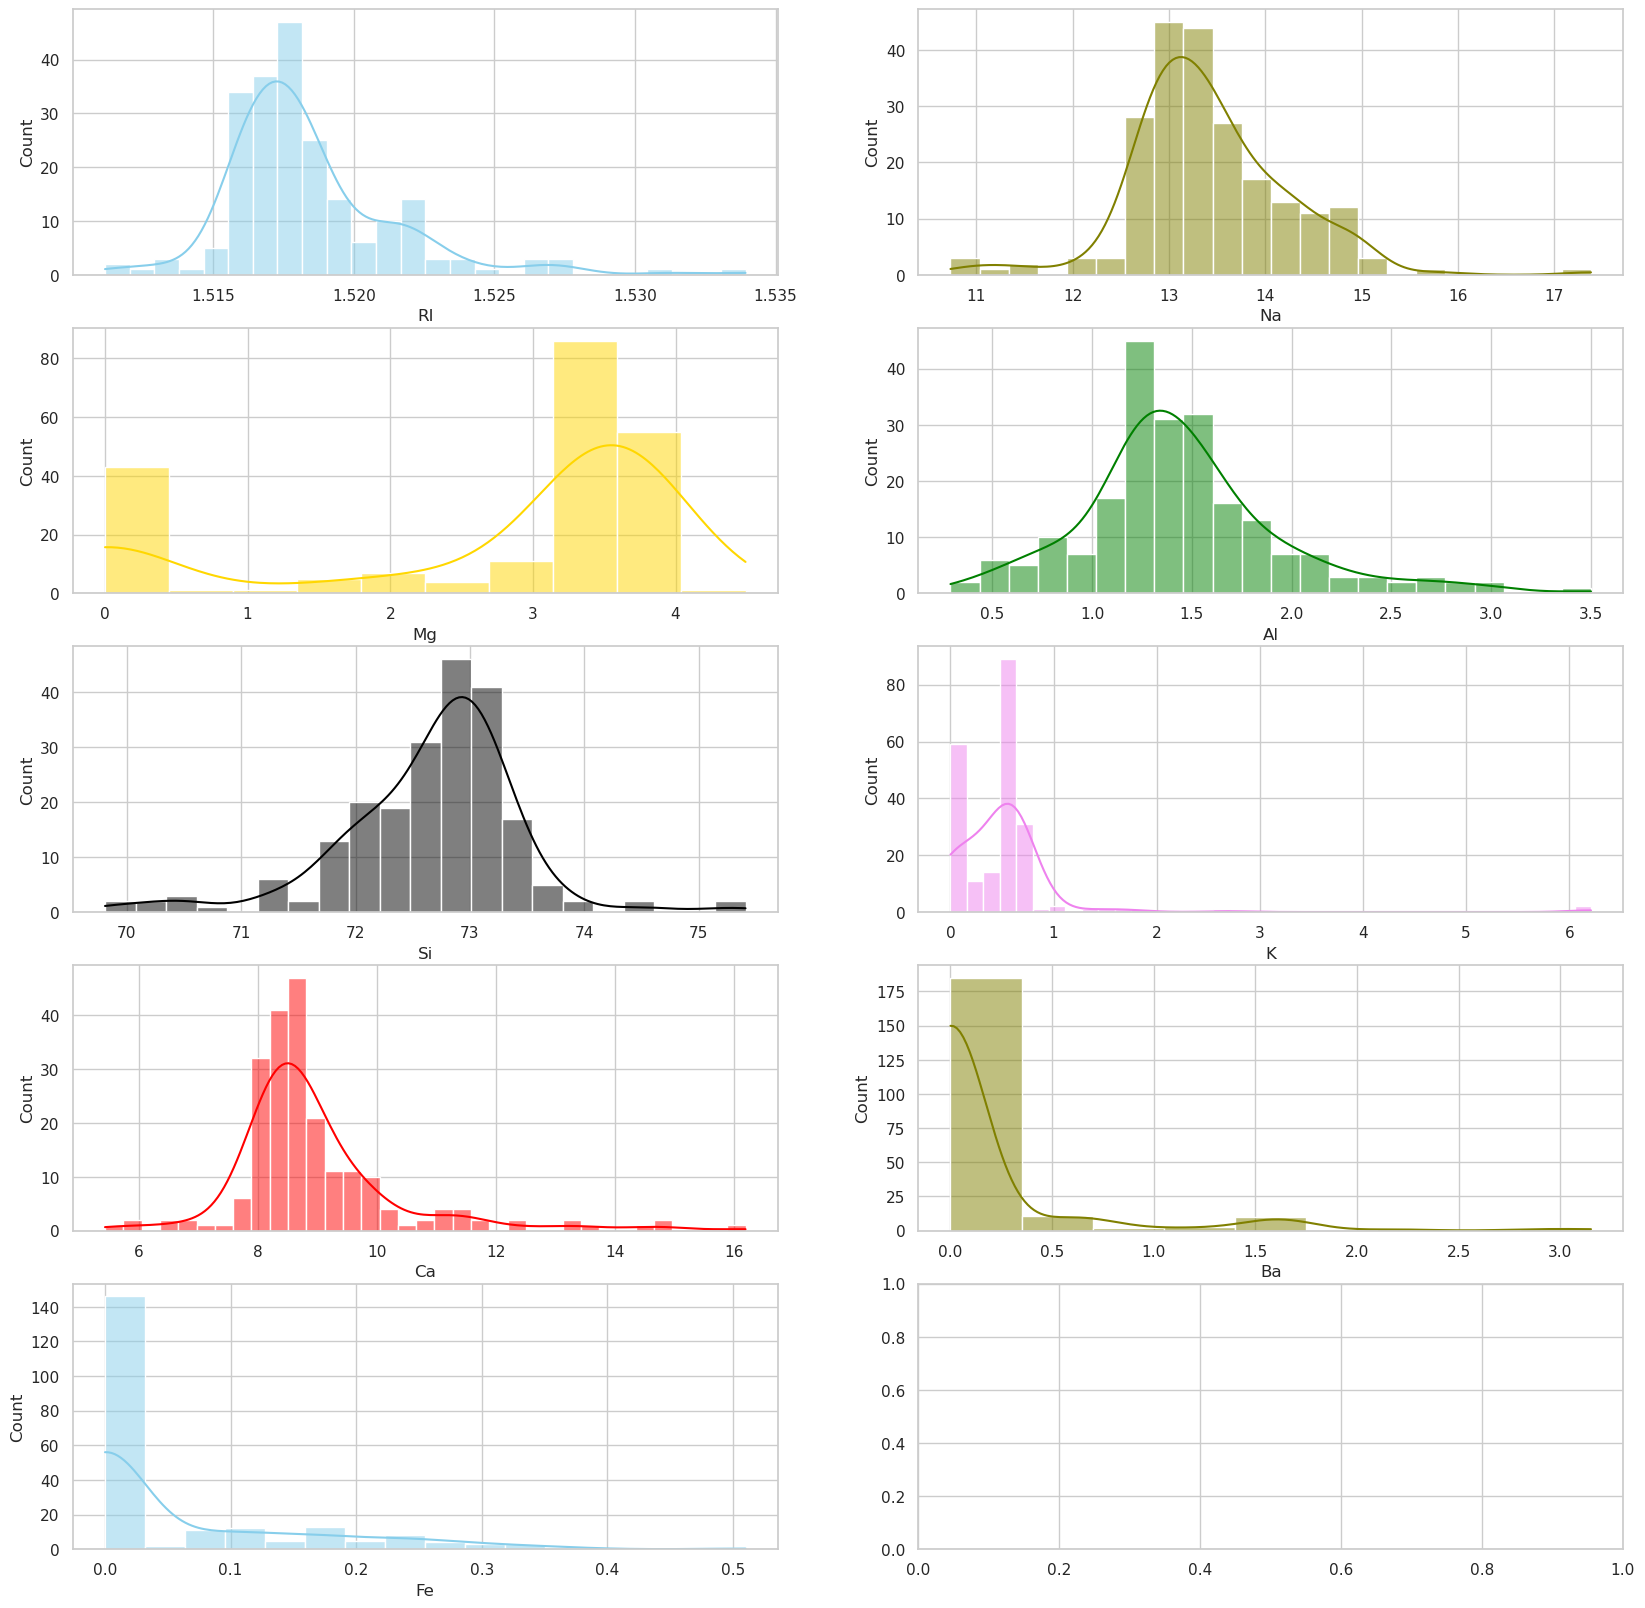

In [13]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

sns.histplot(data=a['RI'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['Na'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['Mg'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['Al'], kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=a['Si'], kde=True, color="black", ax=axs[2, 0])
sns.histplot(data=a['K'], kde=True, color="violet", ax=axs[2, 1])
sns.histplot(data=a['Ca'], kde=True, color="red", ax=axs[3, 0])
sns.histplot(data=a['Ba'], kde=True, color="olive", ax=axs[3, 1])
sns.histplot(data=a['Fe'], kde=True, color="skyblue", ax=axs[4, 0])

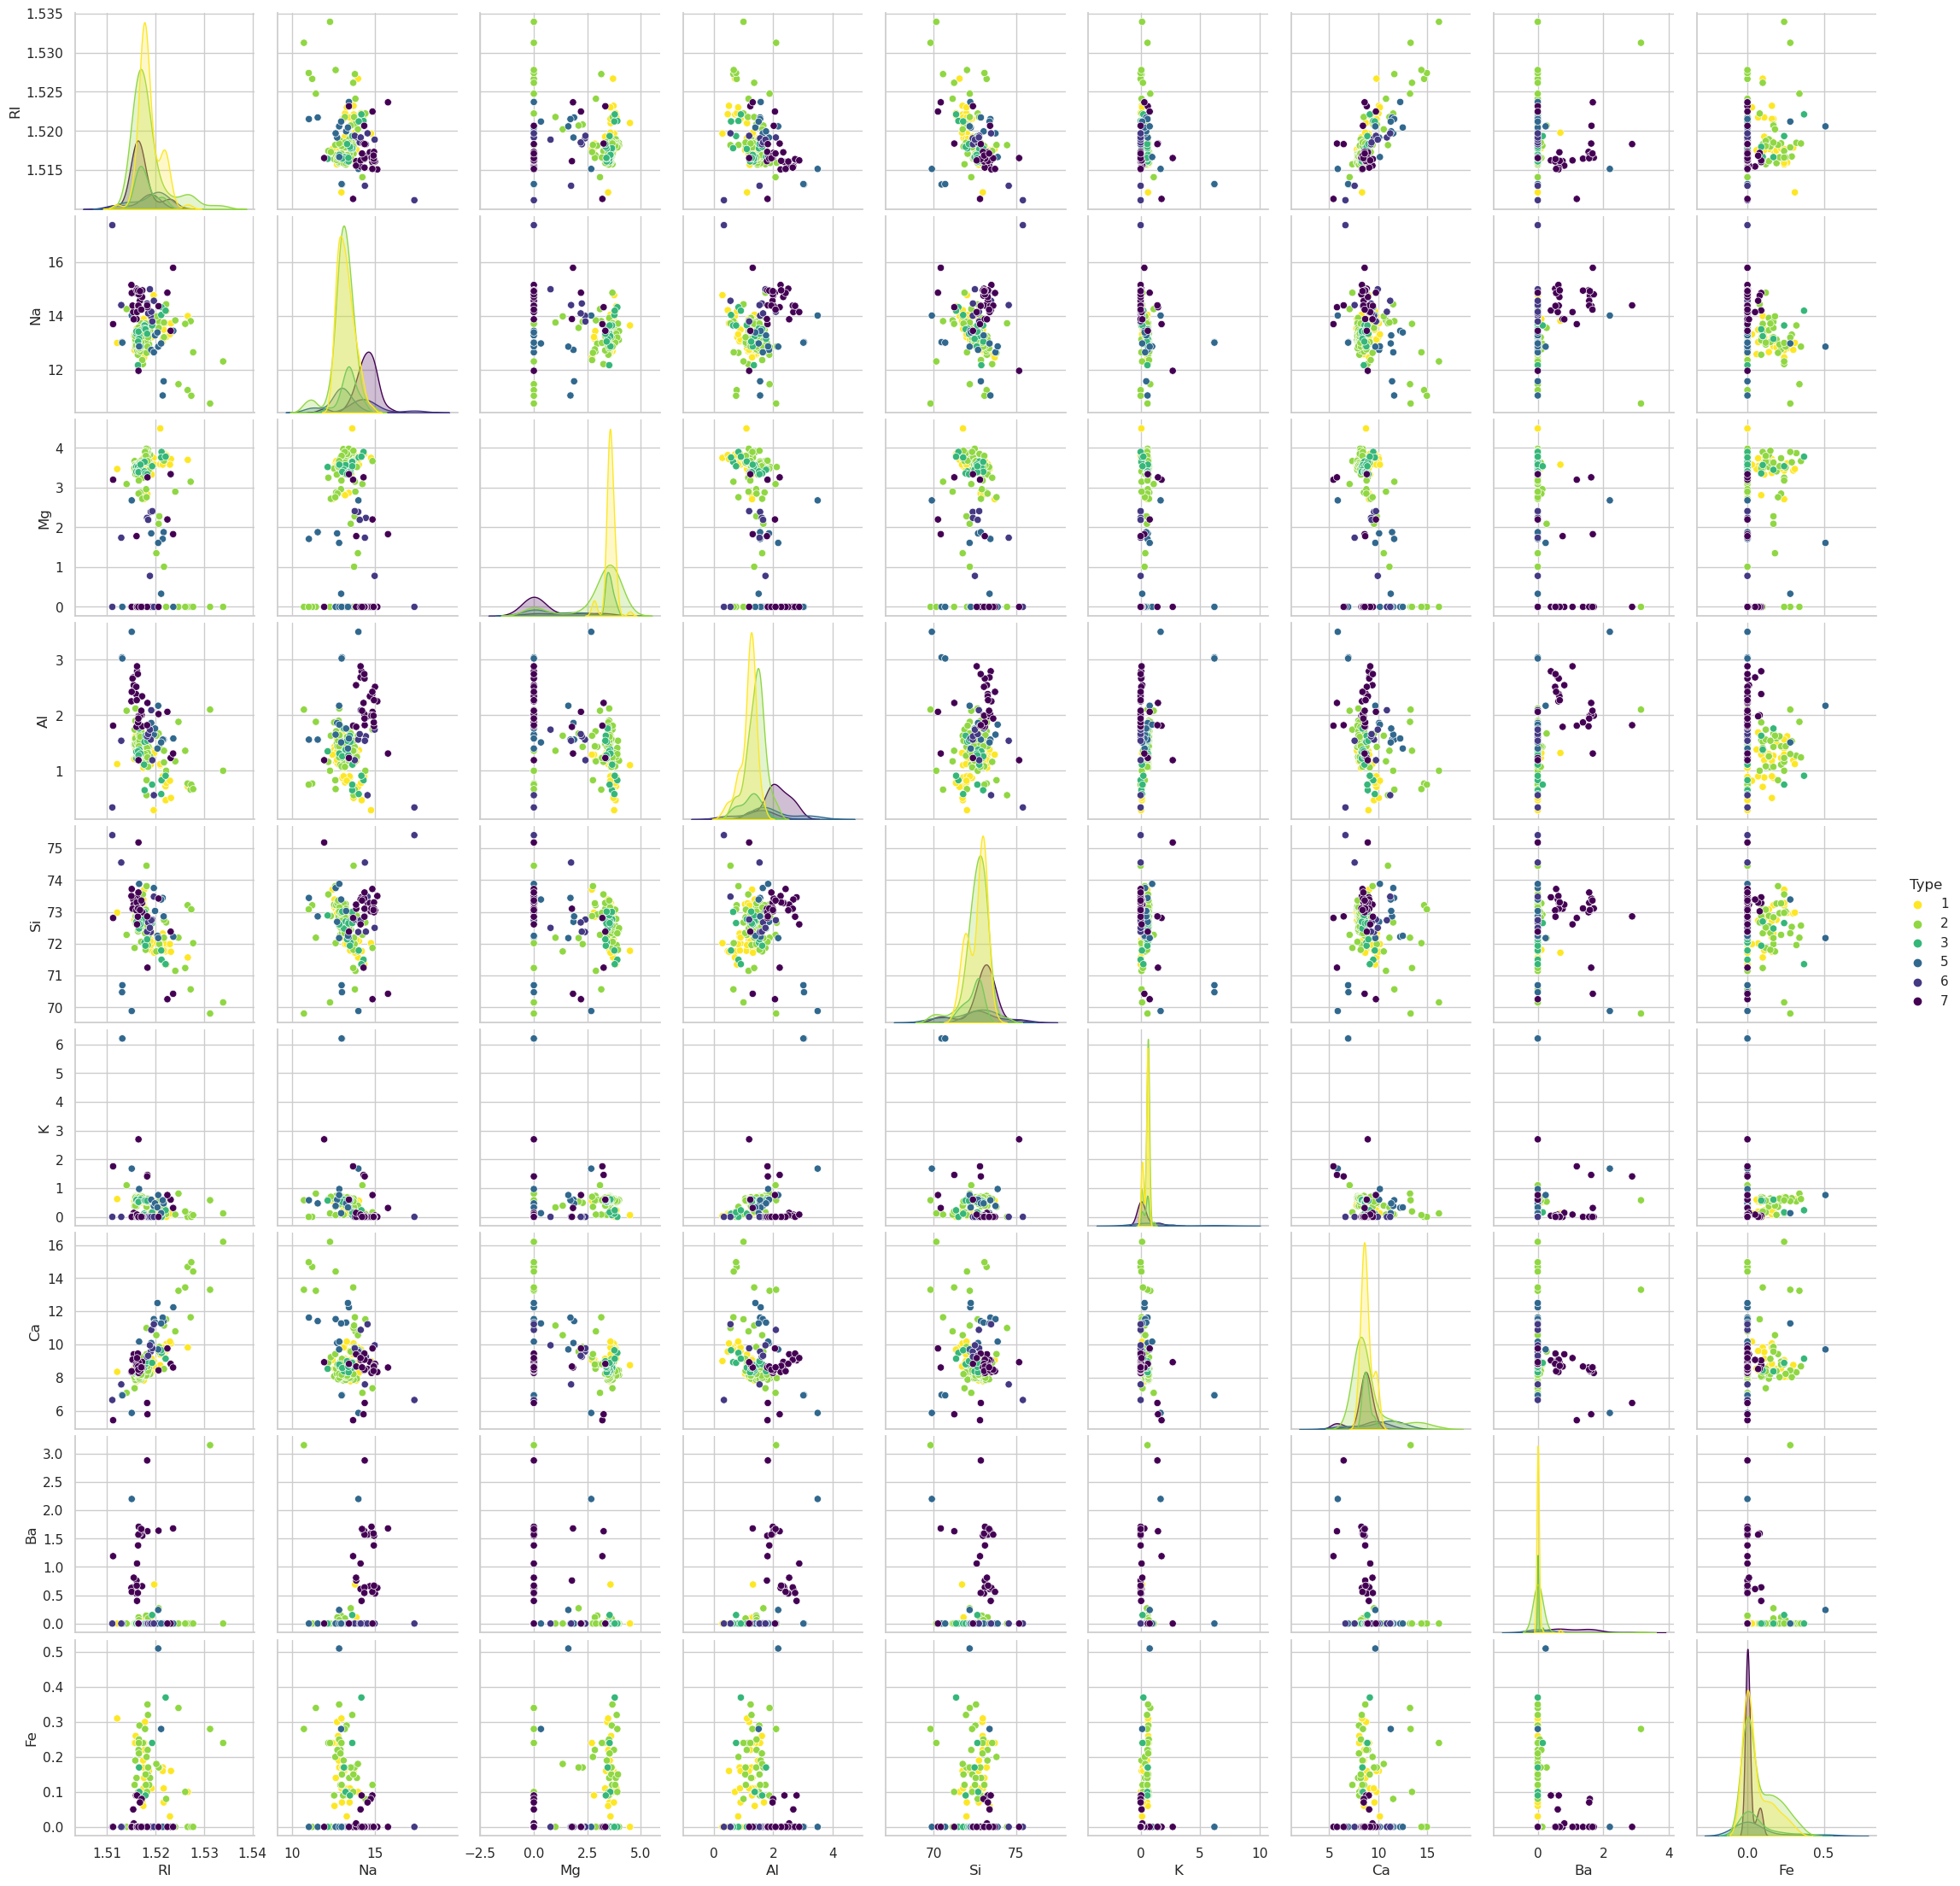

In [14]:
sns.pairplot(a,hue='Type',palette='viridis_r')

In [15]:
a.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

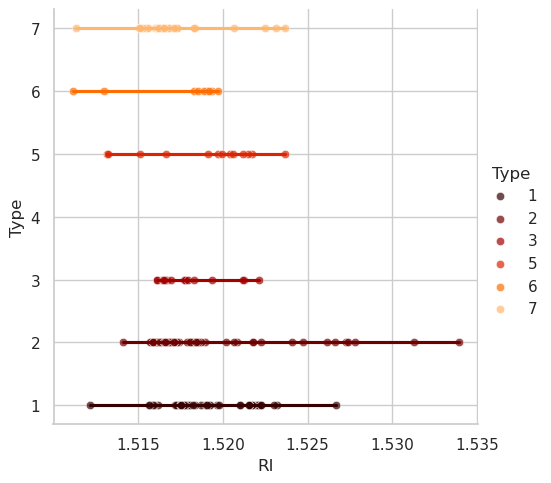

In [16]:
sns.lmplot(x = 'RI', y = 'Type', data = a, hue='Type',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

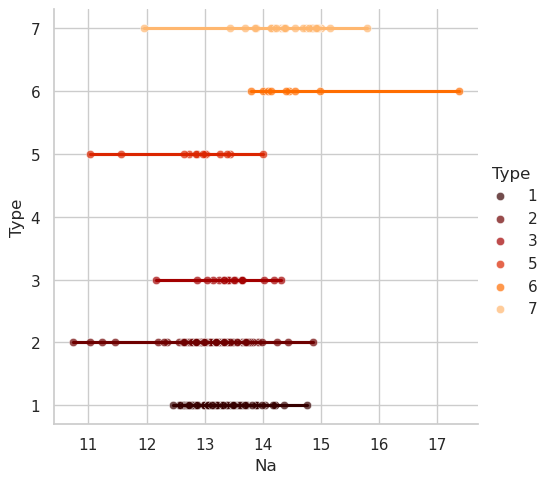

In [17]:
sns.lmplot(x = 'Na', y = 'Type', data = a,hue='Type', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

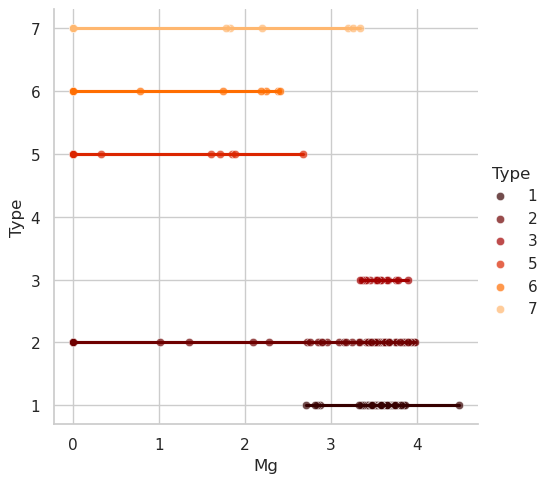

In [18]:
sns.lmplot(x = 'Mg', y = 'Type', data = a, hue='Type',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

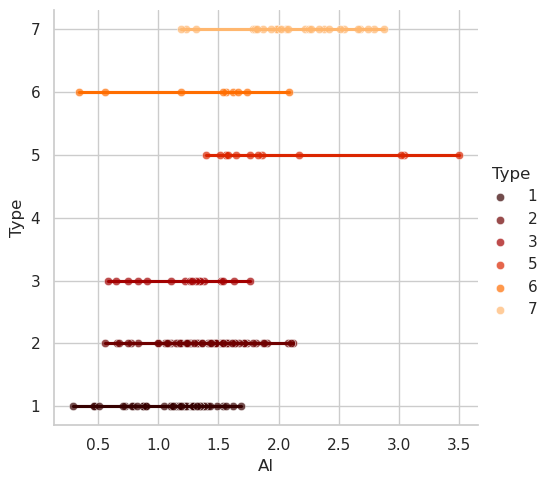

In [19]:
sns.lmplot(x = 'Al', y = 'Type', data = a, hue='Type',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

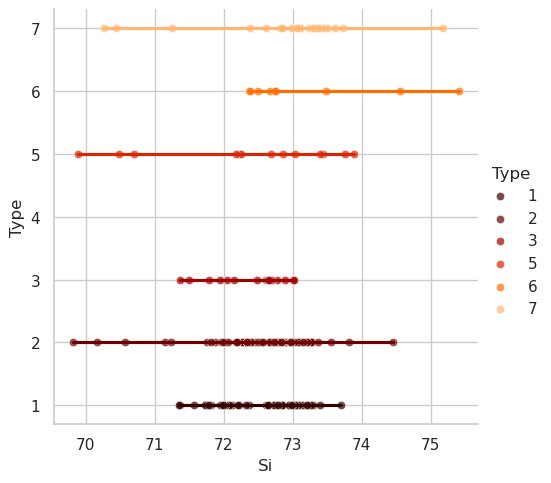

In [20]:
sns.lmplot(x = 'Si', y = 'Type', data = a, hue='Type',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

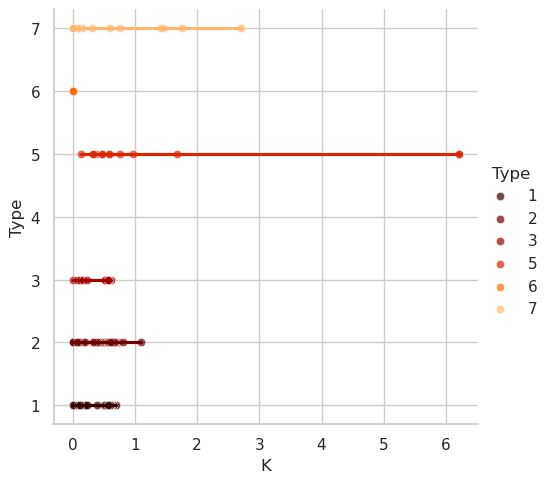

In [21]:
sns.lmplot(x = 'K', y = 'Type', data = a, hue='Type',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

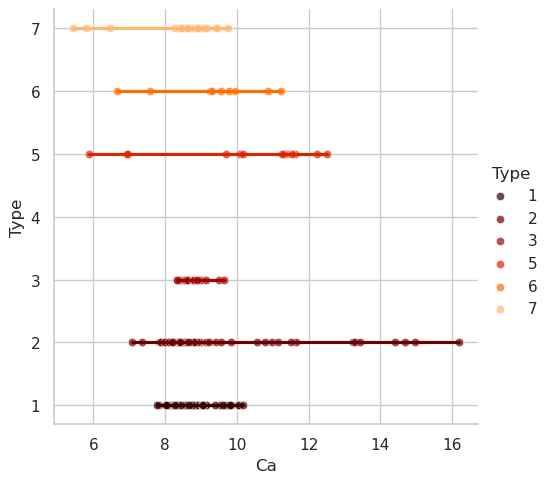

In [22]:
sns.lmplot(x = 'Ca', y = 'Type', data = a, hue='Type',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

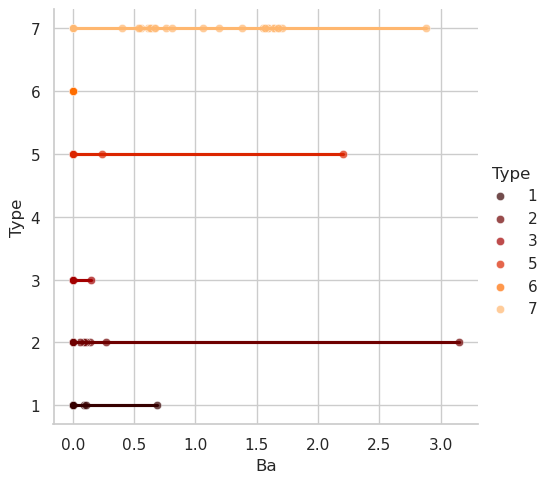

In [23]:
sns.lmplot(x = 'Ba', y = 'Type', data = a, hue='Type',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

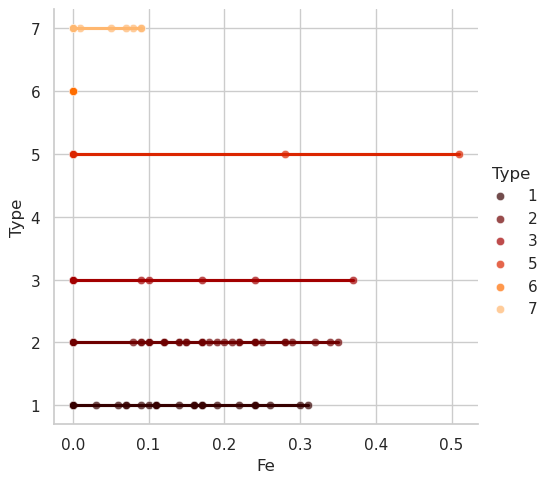

In [24]:
sns.lmplot(x = 'Fe', y = 'Type', data = a, hue='Type',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

<AxesSubplot:>

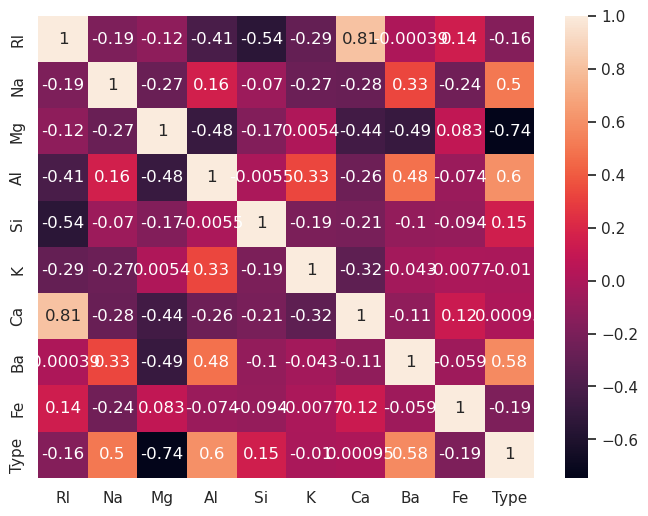

In [25]:
plt.figure(figsize = (8,6))
corr = a.corr()
sns.heatmap(corr, annot = True)

In [26]:
# splitting x(inputs) and y(outputs)

x=a.drop(['Type'],axis=1)
y=a["Type"]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [27]:
# Splitting Training and Testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [28]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,1.724100,13.539484,2.817942,1.561335,72.764392,0.446777,8.866869,0.401003,-0.600279
197,1.825054,13.364261,1.564840,0.803222,72.669951,0.557710,9.010360,-0.677653,0.599987
66,0.292729,13.534330,2.835346,1.940391,73.015150,0.520733,9.245164,0.401003,-1.254969
191,2.275737,13.348800,1.564840,0.772279,72.669951,0.557710,8.960791,-0.644967,-0.382049
117,1.893557,13.465272,2.845789,1.213222,73.067255,0.433154,8.731205,0.401003,0.599987
111,-1.823681,13.743567,1.564840,2.033221,72.735083,0.557710,10.578327,0.401003,0.599987
15,1.702468,13.559068,2.797057,1.661901,72.682978,0.444831,8.864260,0.401003,0.599987
86,2.394718,13.514747,2.779653,1.476240,72.679721,0.483755,8.770339,0.401003,0.599987
75,2.319003,13.537423,2.810980,1.445297,72.722057,0.423423,8.752076,0.401003,0.599987
144,2.066620,13.540515,2.671747,1.661901,72.770906,0.444831,8.973835,0.401003,-2.018775


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [30]:
#Using logistic regression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
lr_train_acc=lr.score(x_train, y_train)
lr_test_acc=lr.score(x_test, y_test)
print("Training Accuracy: ",lr_train_acc)
print("Testing Accuracy: ", lr_test_acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Training Accuracy:  0.68125
Testing Accuracy:  0.14814814814814814
[[ 0  0  0  0  0 14]
 [ 0  0  0  0  0 21]
 [ 0  0  0  0  0  4]
 [ 0  0  0  0  0  4]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  8]]
The Accuracy Score is 0.14814814814814814
Classification Report is               precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.15      1.00      0.26         8

    accuracy                           0.15        54
   macro avg       0.02      0.17      0.04        54
weighted avg       0.02      0.15      0.04        54



In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
#Using KNN classifier

knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_train_acc=knn.score(x_train, y_train)
knn_test_acc=knn.score(x_test, y_test)
print("Training Accuracy: ",knn_train_acc)
print("Testing Accuracy: ", knn_test_acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Training Accuracy:  0.75625
Testing Accuracy:  0.1111111111111111
[[ 0  0  0  0 11  3]
 [ 0  0  0  0 16  5]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  3  1]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  5  3]]
The Accuracy Score is 0.1111111111111111
Classification Report is               precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.07      1.00      0.13         3
           7       0.25      0.38      0.30         8

    accuracy                           0.11        54
   macro avg       0.05      0.23      0.07        54
weighted avg       0.04      0.11      0.05        54



In [33]:
#Using Decision Tree classifier

dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_train_acc=dt.score(x_train, y_train)
dt_test_acc=dt.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred)) 
print('Training Score: ', dt_train_acc)
print('Testing Score: ', dt_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 0  0 14  0  0  0]
 [ 1  0 20  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  3  0  0  0]
 [ 1  0  0  0  0  7]]
Training Score:  0.8
Testing Score:  0.2037037037037037
The Accuracy Score is 0.2037037037037037
Classification Report is               precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.09      1.00      0.16         4
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       1.00      0.88      0.93         8

    accuracy                           0.20        54
   macro avg       0.18      0.31      0.18        54
weighted avg       0.15      0.20      0.15        54



In [34]:
# using Random Forest Classifier

rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_train_acc = rf.score(x_train, y_train) 
rf_test_acc = rf.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', rf_train_acc)
print('Testing Score: ', rf_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 0 14  0  0  0  0]
 [ 0 20  0  0  0  1]
 [ 0  4  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  0  0  8]]
Training Score:  0.93125
Testing Score:  0.5185185185185185
The Accuracy Score is 0.5185185185185185
Classification Report is               precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.44      0.95      0.61        21
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.52        54
   macro avg       0.22      0.33      0.26        54
weighted avg       0.30      0.52      0.38        54



In [35]:
# Using Support Vector Classifier

svc=SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_train_acc = svc.score(x_train, y_train) 
svc_test_acc = svc.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', svc_train_acc)
print('Testing Score: ', svc_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 0 14  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  8  0  0  0  0]]
Training Score:  0.79375
Testing Score:  0.3888888888888889
The Accuracy Score is 0.3888888888888889
Classification Report is               precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.39      1.00      0.56        21
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         8

    accuracy                           0.39        54
   macro avg       0.06      0.17      0.09        54
weighted avg       0.15      0.39      0.22        54



In [36]:
# using GaussianNB classifier

gnb=GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
gnb_train_acc = gnb.score(x_train, y_train) 
gnb_test_acc = gnb.score(x_test, y_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', gnb_train_acc)
print('Testing Score: ', gnb_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 0  0  0 14  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  8  0  0]]
Training Score:  0.3125
Testing Score:  0.07407407407407407
The Accuracy Score is 0.07407407407407407
Classification Report is               precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00         4
           5       0.07      1.00      0.14         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         8

    accuracy                           0.07        54
   macro avg       0.01      0.17      0.02        54
weighted avg       0.01      0.07      0.01        54



In [37]:
x = ['Logistic Regression', 'KNN', 'Decision Tree Classifier','Random Forest Classifier','Support Vector Classifier','GaussianNB']
y1 = [lr_train_acc, knn_train_acc,dt_train_acc,rf_train_acc,svc_train_acc, gnb_train_acc]
y2 = [lr_test_acc, knn_test_acc,dt_test_acc,rf_test_acc,svc_test_acc, gnb_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)